In [58]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from scipy import interpolate

In [2]:
figsize = (8,6)
plt.rc('font', family='sans-serif')
plt.rc('axes', labelsize='xx-large')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')
plt.rc('axes',titlesize='xx-large')
#print(plt.rcParams.keys())

In [3]:
dist, eff, excl = np.genfromtxt('exclusions.txt',unpack=True,skip_header=1)

### just plot raw data 

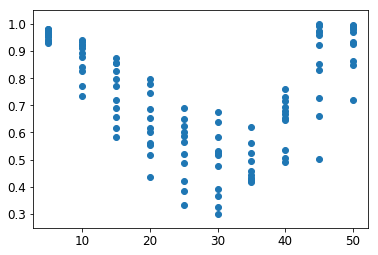

In [4]:
plt.scatter(dist,excl)
plt.show()
# Note, you can see a good downward trend until 35 kpc. At that point, stuff is messed up. 
# Some of is because it has trouble creating contours. For example, the exclusion=1 is probably bc no contour was found.

### Fix the distance

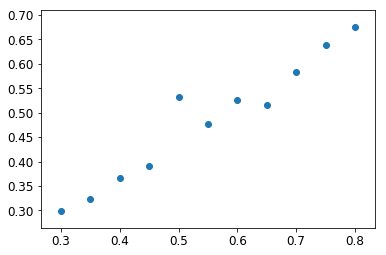

In [5]:
# CONSTANT DISTANCE
d = 30
eff_ = []
excl_ = []
for i in range(len(dist)):
    if dist[i] == d:
        eff_.append(eff[i])
        excl_.append(excl[i])


plt.scatter(eff_,excl_)
plt.show()

### Fix the efficiency

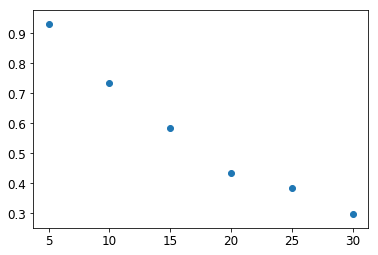

In [6]:
# CONSTANT Efficiency
e = 0.3
dist_ = []
excl_ = []
for i in range(len(eff)):
    if eff[i] == e and dist[i] <= 30:
        dist_.append(dist[i])
        excl_.append(excl[i])

        
plt.scatter(dist_,excl_)
plt.show()

### Use good data + interpolation/extrapolation to create full data set

In [14]:
# Good data (mostly)

dist_good = []; eff_good = []; excl_good = []
for i in range(len(dist)):
    if dist[i] <= 30:
        dist_good.append(dist[i])
        eff_good.append(eff[i])
        excl_good.append(excl[i])

In [15]:
# Fix the problems

for i in range(len(dist_good)):
    if dist_good[i] == 20 and eff_good[i] == 0.45:
        excl_good[i] = 0.58
    if dist_good[i] == 25 and eff_good[i] == 0.35:
        excl_good[i] = 0.41
    if dist_good[i] == 25 and eff_good[i] == 0.45:
        excl_good[i] = 0.48
    if dist_good[i] == 25 and eff_good[i] == 0.5:
        excl_good[i] = 0.52
    if dist_good[i] == 30 and eff_good[i] == 0.5:
        excl_good[i] = 0.42
    if dist_good[i] == 30 and eff_good[i] == 0.65:
        excl_good[i] = 0.55    

In [16]:
print(len(eff_good))

66


In [17]:
# Extrapolation

eff_list = [0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8]
for e in eff_list:
    dist_ = []
    excl_ = []
    
    # get data for this efficiency
    for i in range(len(eff_good)):
        if eff_good[i] == e:
            dist_.append(dist_good[i])
            excl_.append(excl_good[i])
    
    # linear fit and extrapolate
    params = np.polyfit(dist_,excl_,1)
    def f(x):
        return params[0]*x + params[1]
    dist_extend = np.linspace(35,70,8)
    for d in dist_extend:
        eff_good.append(e)
        dist_good.append(d)
        if f(d) >= 0:
            excl_good.append(f(d))
        else:
            excl_good.append(0)
        #print('e =',e,'  d =',d,'  excl =',f(d))

In [18]:
print(len(eff_good))

154


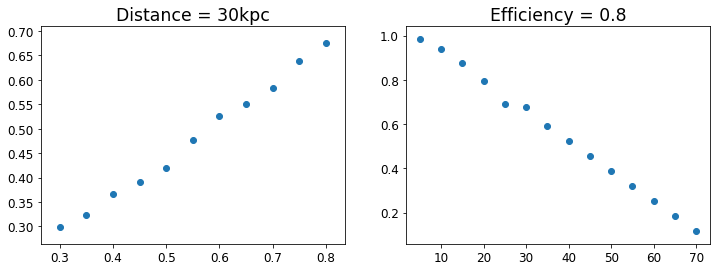

In [19]:
# Look at constant distance and efficiencies again

FIG,(AX1,AX2) = plt.subplots(1,2,figsize=(12,4))

# CONSTANT DISTANCE
d = 30
eff_ = []
excl_ = []
for i in range(len(dist_good)):
    if dist_good[i] == d:
        eff_.append(eff_good[i])
        excl_.append(excl_good[i])

AX1.scatter(eff_,excl_)
AX1.set_title('Distance = '+str(d)+'kpc')

# CONSTANT Efficiency
e = 0.8
dist_ = []
excl_ = []
for i in range(len(eff_good)):
    if eff_good[i] == e:
        dist_.append(dist_good[i])
        excl_.append(excl_good[i])

AX2.scatter(dist_,excl_)
AX2.set_title('Efficiency = '+str(e))

plt.show()

In [20]:
# interpolate

x = np.linspace(np.min(dist_good),np.max(dist_good))
y = np.linspace(np.min(eff_good),np.max(eff_good))
x,y = np.meshgrid(x,y)

z = interpolate.griddata((dist_good,eff_good),excl_good,(x.ravel(),y.ravel()))
        
z = z.reshape(x.shape)

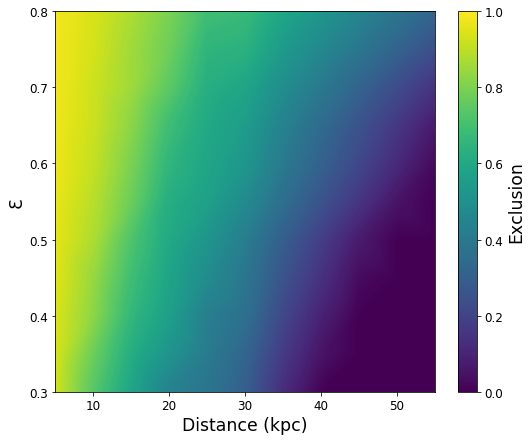

In [59]:
# Contour plot        
fig,ax = plt.subplots(1,1,figsize=(8.5,7))
cont = ax.contourf(x,y,z,np.linspace(-1e-5,1,300))
cbar = fig.colorbar(cont,ticks=np.linspace(0,1,6))

ax.set_xlim(5,55)
ax.set_xlabel('Distance (kpc)')
ax.set_ylabel('Ɛ')
cbar.ax.set_ylabel('Exclusion')

pylab.savefig('figure_of_merit_halo2.png')

plt.show()